# Competition



Brief Description of the Dataset: 
--------------------------------- 
    Each of the 19 activities is performed by eight subjects (4 female, 4 male, between the ages 20 and 30) for 5 minutes. 
    Total signal duration is 5 minutes for each activity of each subject. 
    The subjects are asked to perform the activities in their own style and were not restricted on how the activities should be performed. For this reason, there are inter-subject variations in the speeds and amplitudes of some activities. 
    The activities are performed at the Bilkent University Sports Hall, in the Electrical and Electronics Engineering Building, 
    and in a flat outdoor area on campus. Sensor units are calibrated to acquire data at 25 Hz sampling frequency. The 5-min signals are divided into 5-sec segments so that 480(=60x8) signal segments are obtained for each activity. 

    The 19 activities are: 
        sitting (A1), 
        standing (A2), 
        lying on back and on right side (A3 and A4), 
        ascending and descending stairs (A5 and A6), 
        standing in an elevator still (A7) 
        and moving around in an elevator (A8), 
        walking in a parking lot (A9), 
        walking on a treadmill with a speed of 4 km/h (in flat and 15 deg inclined positions) (A1 
        0 and A11), 
        running on a treadmill with a speed of 8 km/h (A12), 
        exercising on a stepper (A13), 
        exercising on a cross trainer (A14), 
        cycling on an exercise bike in horizontal and vertical positions (A15 and A16), 
        rowing (A17), 
        jumping (A18), 
        and playing basketball (A19). 

    File structure: 

        19 activities (a) (in the order given above) 
        8 subjects (p) 
        60 segments (s) 
        5 units on torso (T), right arm (RA), left arm (LA), right leg (RL), left leg (LL) 
        9 sensors on each unit (x,y,z accelerometers, x,y,z gyroscopes, x,y,z magnetometers) 

    Folders a01, a02, ..., a19 contain data recorded from the 19 activities. 

    For each activity, the subfolders p1, p2, ..., p8 contain data from each of the 8 subjects. 

    In each subfolder, there are 60 text files s01, s02, ..., s60, one for each segment. 

    In each text file, there are 5 units x 9 sensors = 45 columns and 5 sec x 25 Hz = 125 rows. 
    Each column contains the 125 samples of data acquired from one of the sensors of one of the units over a period of 5 sec. 
    Each row contains data acquired from all of the 45 sensor axes at a particular sampling instant separated by commas. 

    Columns 1-45 correspond to: 
    T_xacc, T_yacc, T_zacc, T_xgyro, ..., T_ymag, T_zmag, 
    RA_xacc, RA_yacc, RA_zacc, RA_xgyro, ..., RA_ymag, RA_zmag, 
    LA_xacc, LA_yacc, LA_zacc, LA_xgyro, ..., LA_ymag, LA_zmag, 
    RL_xacc, RL_yacc, RL_zacc, RL_xgyro, ..., RL_ymag, RL_zmag, 
    LL_xacc, LL_yacc, LL_zacc, LL_xgyro, ..., LL_ymag, LL_zmag. 

    Therefore, 
    columns 1-9 correspond to the sensors in unit 1 (T), 
    columns 10-18 correspond to the sensors in unit 2 (RA), 
    columns 19-27 correspond to the sensors in unit 3 (LA), 
    columns 28-36 correspond to the sensors in unit 4 (RL), 
    columns 37-45 correspond to the sensors in unit 5 (LL). 

    * accelerometers - an instrument for measuring the acceleration of a moving or vibrating body.
    * gyroscope      - a device consisting of a wheel or disc mounted so that it can spin rapidly about an axis which is itself free to alter in direction. The orientation of the axis is not affected by tilting of the mounting, so gyroscopes can be used to provide stability or maintain a reference direction in navigation systems, automatic pilots, and stabilizers
    * magnetometer   - an instrument used for measuring magnetic forces, especially the earth's magnetism

### Import packages

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data collection and data import

In [247]:
import glob

clist = ['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro','T_xmag', 'T_ymag', 'T_zmag', 
         'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
         'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag', 
         'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
         'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag']


li = []
activity =['sitting','standing','lying on back side','lying on right side','Ascending stairs','Decending stairs','standing in an elevator','moving around in an elevator',
           'walking in a parking lot','walking (4 km/h) in flat',
           'walking (4 km/h) in 15 deg inclined','running (8 km/hr)',
           'exercising on a stepper','exercising on a cross trainer','cycling in horizontal position',
           'cycling in vertical position','rowing','jumping','playing basketball']
for a in range(1,20):
    path = '/Users/bilalaliyar/Study/Python/Activity/Competition/data/a'+str(a).rjust(2,'0')
    print(path)
    for i in range(1,9):
        path = path+'/p'+str(i) 
        all_files = glob.glob(path + "/*.txt")

        for filename in all_files:
            #print(filename)
            df = pd.read_csv(filename, index_col=None, header=None)
            df.columns=clist
            df['Activity'] = activity[a-1]
            li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)


/Users/bilalaliyar/Study/Python/Activity/Competition/data/a01
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a02
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a03
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a04
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a05
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a06
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a07
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a08
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a09
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a10
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a11
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a12
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a13
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a14
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a15
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a16
/Users/b

In [248]:
data.tail()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
142495,-4.7608,1.31280,0.20364,-11.4160,1.64490,-0.54245,0.45926,0.637180,0.68726,2.0234,...,-9.5892,0.428430,1.11030,0.220950,0.18457,0.085518,0.94546,0.39170,0.43064,playing basketball
142496,-32.8290,4.31990,1.05480,-8.8446,-10.55700,1.81180,0.62050,0.348130,0.76128,12.6640,...,-9.6936,1.524600,-0.33781,0.159330,0.35232,0.099437,0.94258,0.39279,0.43846,playing basketball
142497,-22.3670,1.44200,-4.22610,-9.1876,-3.95600,-3.36090,0.83001,0.047418,0.71965,11.3390,...,-9.3950,1.301600,-1.06550,0.144290,0.44254,0.045672,0.93697,0.39419,0.45266,playing basketball
142498,-6.6664,5.67410,-4.81810,6.9376,6.53780,1.78500,0.78052,0.093621,0.77562,4.8804,...,-9.8616,-0.055845,-1.03220,-0.133010,0.24619,0.217160,0.93210,0.38932,0.46476,playing basketball
142499,-8.0807,0.67418,3.56130,10.0630,0.05921,6.11270,0.67799,0.331990,0.82513,4.2783,...,-9.5820,-2.564200,-1.87090,0.061198,0.30062,0.170880,0.93405,0.37985,0.47160,playing basketball


In [249]:
data.shape

(142500, 46)

In [250]:
data.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000,142498.000000,142500.000000,142500.000000,142500.000000,...,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000,142500.000000
mean,7.674666,-0.098671,3.767543,-0.006260,0.012471,-0.001569,-0.572279,-0.007060,-0.383496,2.924684,...,0.003542,-7.363631,-3.305088,0.310282,-0.018433,0.014556,-0.007976,0.424897,0.342584,-0.015896
std,5.630315,2.402581,2.909811,0.889036,0.836931,0.359432,0.291079,0.315200,0.352919,5.146268,...,0.324464,5.932486,6.346880,2.938506,0.836230,0.434831,1.215209,0.301136,0.327792,0.324900
min,-99.715000,-49.941000,-50.677000,-25.579000,-23.598000,-8.498900,-1.051000,-0.742470,-1.034500,-30.019000,...,-0.886080,-93.940000,-95.898000,-30.854000,-8.929700,-4.623400,-6.138300,-0.647270,-0.850280,-1.126000
25%,6.778350,-0.611113,2.360975,-0.161230,-0.116583,-0.088415,-0.790360,-0.205782,-0.703703,-0.613252,...,-0.249092,-9.893600,-8.509900,-0.995045,-0.320802,-0.097239,-0.447805,0.268170,0.136028,-0.339898
50%,8.437900,0.253460,3.720800,0.000000,0.015423,-0.002445,-0.653210,-0.076862,-0.464780,3.361200,...,-0.004469,-8.810400,-2.534650,-0.136190,-0.003309,0.000878,-0.000684,0.441100,0.379330,0.012582
75%,9.410500,1.222025,5.259300,0.172893,0.184522,0.084597,-0.455357,0.267000,-0.084659,7.045900,...,0.286225,-2.769275,0.290587,1.065800,0.211375,0.118953,0.538838,0.647650,0.568700,0.157010
max,70.835000,23.300000,54.551000,27.671000,14.379000,19.262000,1.021500,1.019000,0.963390,70.029000,...,0.852120,11.577000,62.912000,33.062000,10.381000,7.514900,5.907600,1.127200,1.037100,0.806770


In [251]:
data['Activity']. value_counts()

playing basketball                     7500
moving around in an elevator           7500
lying on back side                     7500
standing in an elevator                7500
jumping                                7500
rowing                                 7500
Ascending stairs                       7500
Decending stairs                       7500
walking (4 km/h) in 15 deg inclined    7500
walking (4 km/h) in flat               7500
standing                               7500
exercising on a stepper                7500
exercising on a cross trainer          7500
running (8 km/hr)                      7500
cycling in vertical position           7500
walking in a parking lot               7500
cycling in horizontal position         7500
lying on right side                    7500
sitting                                7500
Name: Activity, dtype: int64

In [252]:
data.isnull().sum()

T_xacc      0
T_yacc      0
T_zacc      0
T_xgyro     0
T_ygyro     0
T_zgyro     0
T_xmag      2
T_ymag      0
T_zmag      0
RA_xacc     0
RA_yacc     0
RA_zacc     0
RA_xgyro    0
RA_ygyro    1
RA_zgyro    0
RA_xmag     0
RA_ymag     0
RA_zmag     0
LA_xacc     0
LA_yacc     0
LA_zacc     0
LA_xgyro    0
LA_ygyro    0
LA_zgyro    0
LA_xmag     0
LA_ymag     0
LA_zmag     0
RL_xacc     0
RL_yacc     0
RL_zacc     0
RL_xgyro    0
RL_ygyro    0
RL_zgyro    0
RL_xmag     0
RL_ymag     0
RL_zmag     0
LL_xacc     0
LL_yacc     0
LL_zacc     0
LL_xgyro    0
LL_ygyro    0
LL_zgyro    0
LL_xmag     0
LL_ymag     0
LL_zmag     0
Activity    0
dtype: int64

## Data preprocessing

array([[<AxesSubplot:title={'center':'T_xacc'}>,
        <AxesSubplot:title={'center':'T_yacc'}>,
        <AxesSubplot:title={'center':'T_zacc'}>,
        <AxesSubplot:title={'center':'T_xgyro'}>,
        <AxesSubplot:title={'center':'T_ygyro'}>,
        <AxesSubplot:title={'center':'T_zgyro'}>,
        <AxesSubplot:title={'center':'T_xmag'}>],
       [<AxesSubplot:title={'center':'T_ymag'}>,
        <AxesSubplot:title={'center':'T_zmag'}>,
        <AxesSubplot:title={'center':'RA_xacc'}>,
        <AxesSubplot:title={'center':'RA_yacc'}>,
        <AxesSubplot:title={'center':'RA_zacc'}>,
        <AxesSubplot:title={'center':'RA_xgyro'}>,
        <AxesSubplot:title={'center':'RA_ygyro'}>],
       [<AxesSubplot:title={'center':'RA_zgyro'}>,
        <AxesSubplot:title={'center':'RA_xmag'}>,
        <AxesSubplot:title={'center':'RA_ymag'}>,
        <AxesSubplot:title={'center':'RA_zmag'}>,
        <AxesSubplot:title={'center':'LA_xacc'}>,
        <AxesSubplot:title={'center':'LA_yacc'}>,
 

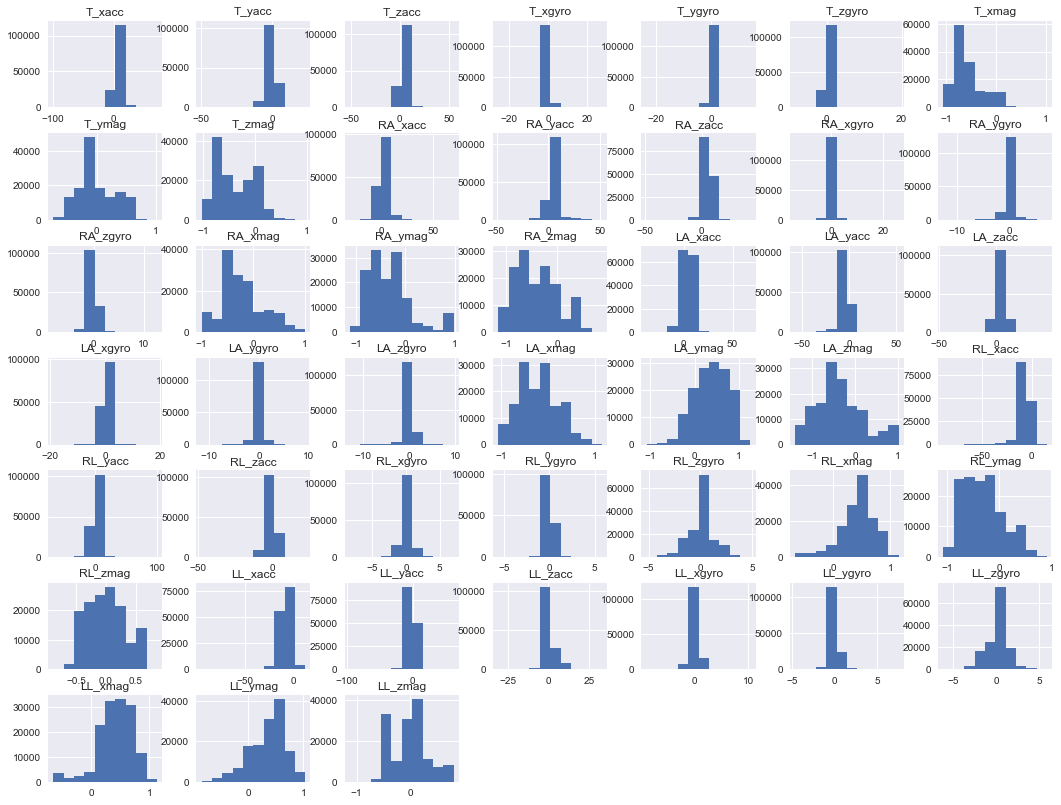

In [253]:
data.hist(figsize=(18, 14))

### Handling missing values in the dataset

In [254]:
data.isnull().sum()

T_xacc      0
T_yacc      0
T_zacc      0
T_xgyro     0
T_ygyro     0
T_zgyro     0
T_xmag      2
T_ymag      0
T_zmag      0
RA_xacc     0
RA_yacc     0
RA_zacc     0
RA_xgyro    0
RA_ygyro    1
RA_zgyro    0
RA_xmag     0
RA_ymag     0
RA_zmag     0
LA_xacc     0
LA_yacc     0
LA_zacc     0
LA_xgyro    0
LA_ygyro    0
LA_zgyro    0
LA_xmag     0
LA_ymag     0
LA_zmag     0
RL_xacc     0
RL_yacc     0
RL_zacc     0
RL_xgyro    0
RL_ygyro    0
RL_zgyro    0
RL_xmag     0
RL_ymag     0
RL_zmag     0
LL_xacc     0
LL_yacc     0
LL_zacc     0
LL_xgyro    0
LL_ygyro    0
LL_zgyro    0
LL_xmag     0
LL_ymag     0
LL_zmag     0
Activity    0
dtype: int64

In [255]:
data['T_xmag'] = data['T_xmag'].fillna(data['T_xmag'].median())
data['RA_ygyro'] = data['RA_ygyro'].fillna(data['RA_ygyro'].mean())

### Outliner detection and handling

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(1, 0, 'T_xacc'),
  Text(2, 0, 'T_yacc'),
  Text(3, 0, 'T_zacc'),
  Text(4, 0, 'T_xgyro'),
  Text(5, 0, 'T_ygyro'),
  Text(6, 0, 'T_zgyro'),
  Text(7, 0, 'T_xmag'),
  Text(8, 0, 'T_ymag'),
  Text(9, 0, 'T_zmag'),
  Text(10, 0, 'RA_xacc'),
  Text(11, 0, 'RA_yacc'),
  Text(12, 0, 'RA_zacc'),
  Text(13, 0, 'RA_xgyro'),
  Text(14, 0, 'RA_ygyro'),
  Text(15, 0, 'RA_zgyro'),
  Text(16, 0, 'RA_xmag'),
  Text(17, 0, 'RA_ymag'),
  Text(18, 0, 'RA_zmag'),
  Text(19, 0, 'LA_xacc'),
  Text(20, 0, 'LA_yacc'),
  Text(21, 0, 'LA_zacc'),
  Text(22, 0, 'LA_xgyro'),
  Text(23, 0, 'LA_ygyro'),
  Text(24, 0, 'LA_zgyro'),
  Text(25, 0, 'LA_xmag'),
  Text(26, 0, 'LA_ymag'),
  Text(27, 0, 'LA_zmag'),
  Text(28, 0, 'RL_xacc'),
  Text(29, 0, 'RL_yacc'),
  Text(30, 0, 'RL_zacc'),
  Text(31, 0, 'RL_xgyro

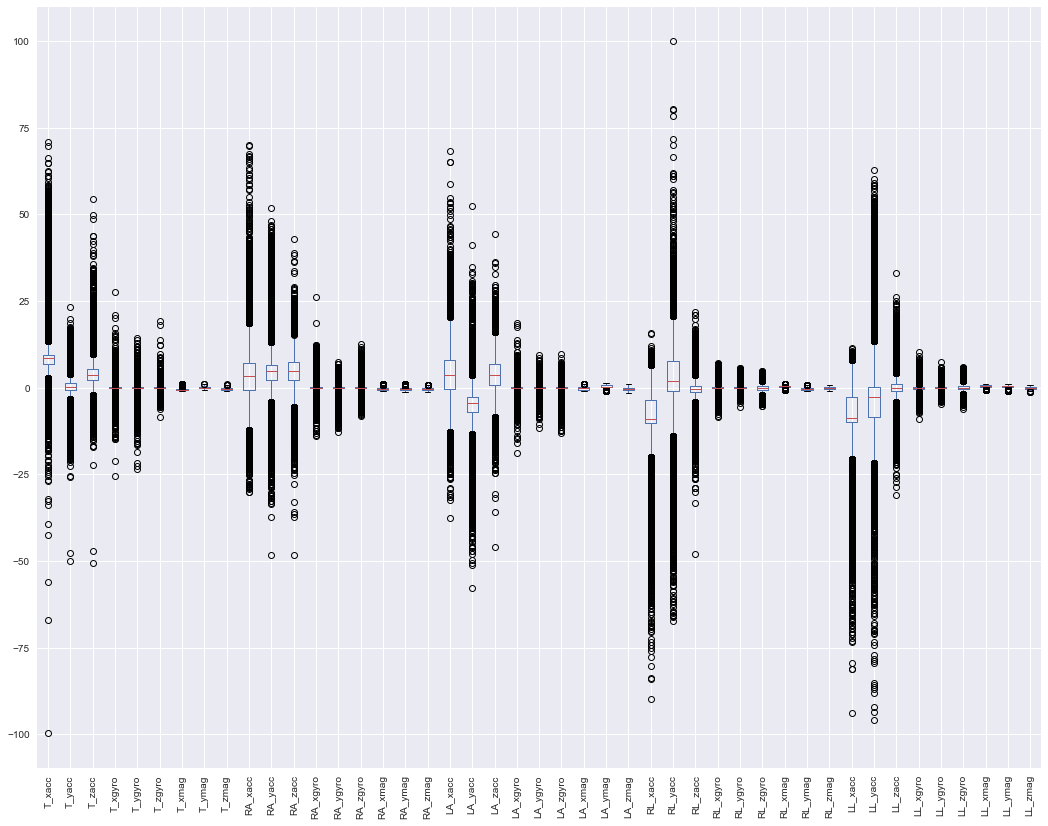

In [256]:
plt.figure(figsize=(18, 14))
data.boxplot()
plt.xticks(rotation=90) 

Text(0.5, 1.0, 'Box plot of T_xacc')

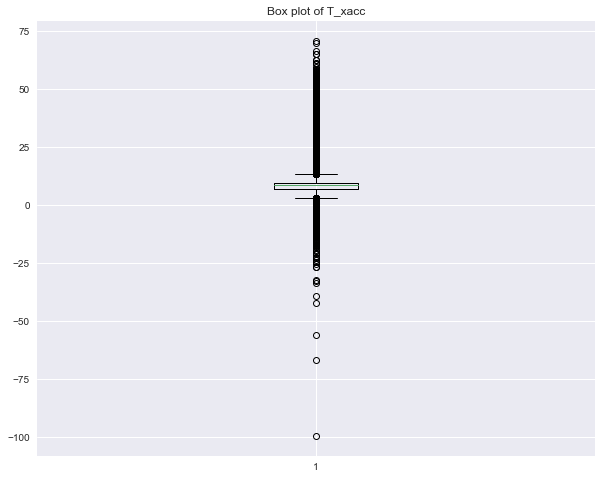

In [257]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_xacc'])
plt.title('Box plot of T_xacc')

In [258]:
#Finding the percentiles and interquadrilerange (IQR)

In [259]:
Q1 = np.percentile(data['T_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['T_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['T_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['T_xacc']<low_limit) | (data['T_xacc']>upper_limit)]['T_xacc']


Q1- 6.7783
Q2- 8.437899999999999
Q3- 9.4105
IQR- 2.632200000000001
low_limit- 2.8299999999999983
upper_limit- 13.358800000000002


In [260]:
out

,outlier
15000,-4.7785
15001,-4.7489
15002,-4.7787
15003,-4.8233
15004,-4.7489
...,...
142495,-4.7608
142496,-32.8290
142497,-22.3670
142498,-6.6664


In [261]:
# Removing the ouliners
ind1= (data['T_xacc']<low_limit) | (data['T_xacc']>upper_limit)
#ind = data.loc((data['Fare']<low_limit) | (data['Fare']>upper_limit)).index

data.drop(data.loc[ind1].index,inplace=True)

In [262]:
data.shape

(109800, 46)

Text(0.5, 1.0, 'Box plot of T_xacc')

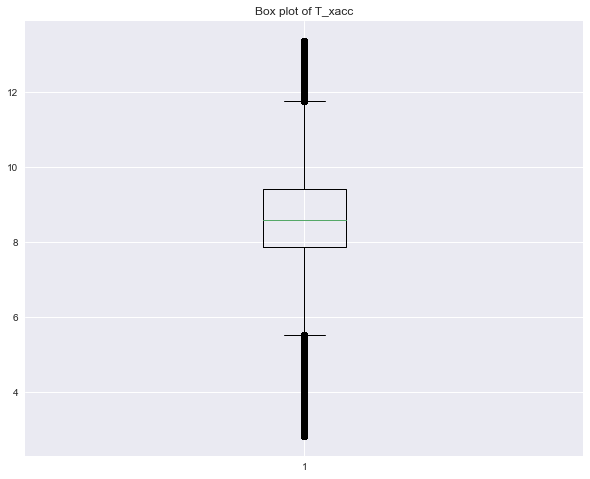

In [263]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_xacc'])
plt.title('Box plot of T_xacc')

Text(0.5, 1.0, 'Box plot of RL_xacc')

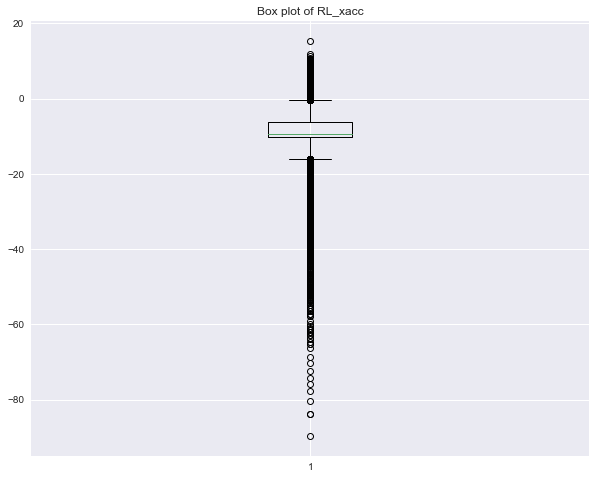

In [264]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RL_xacc'])
plt.title('Box plot of RL_xacc')

In [265]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['RL_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['RL_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['RL_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['RL_xacc']<low_limit) | (data['RL_xacc']>upper_limit)]['RL_xacc']

out

Q1- -10.108
Q2- -9.49155
Q3- -6.19825
IQR- 3.9097500000000007
low_limit- -15.972625
upper_limit- -0.33362499999999873


,outlier
30037,-19.891
30145,-20.186
30189,-21.592
30255,-16.497
30343,-16.298
...,...
142298,-18.064
142357,-16.746
142369,-20.167
142449,-23.784


Text(0.5, 1.0, 'Box plot of RL_xacc')

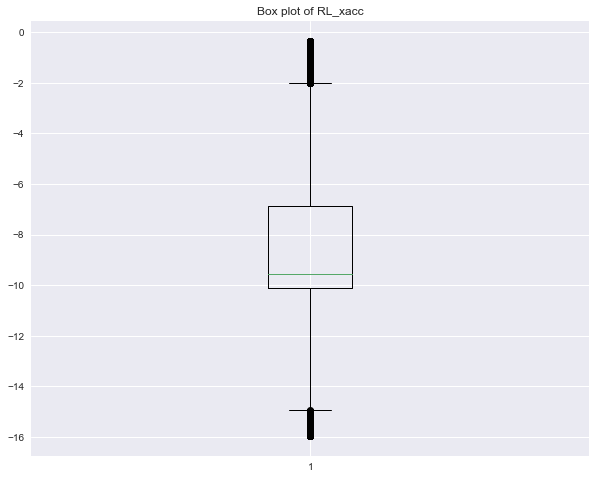

In [266]:
# Removing the ouliners
ind1= (data['RL_xacc']<low_limit) | (data['RL_xacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)
data.shape
plt.figure(figsize=(10, 8))
plt.boxplot(data['RL_xacc'])
plt.title('Box plot of RL_xacc')

Text(0.5, 1.0, 'Box plot of T_yacc')

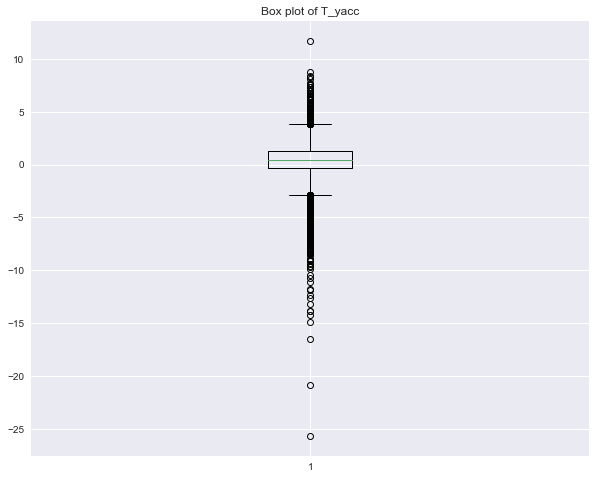

In [267]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_yacc'])
plt.title('Box plot of T_yacc')

In [268]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['T_yacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['T_yacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['T_yacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['T_yacc']<low_limit) | (data['T_yacc']>upper_limit)]['T_yacc']
# Removing the ouliners
ind1= (data['T_yacc']<low_limit) | (data['T_yacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)


Q1- -0.34668
Q2- 0.44398
Q3- 1.3139
IQR- 1.66058
low_limit- -2.8375500000000002
upper_limit- 3.8047700000000004


Text(0.5, 1.0, 'Box plot of T_yacc')

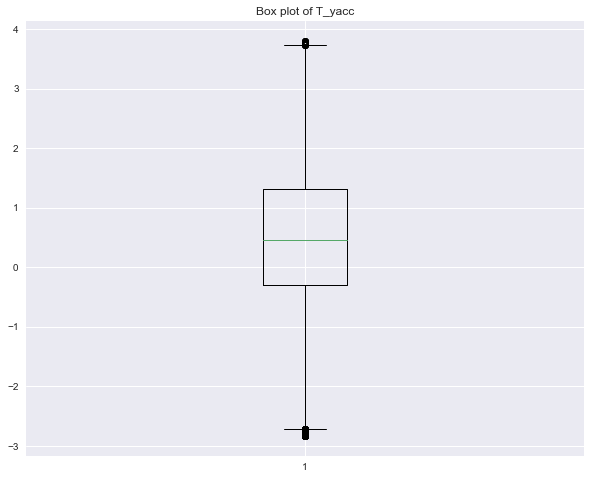

In [269]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_yacc'])
plt.title('Box plot of T_yacc')

Text(0.5, 1.0, 'Box plot of RA_xacc')

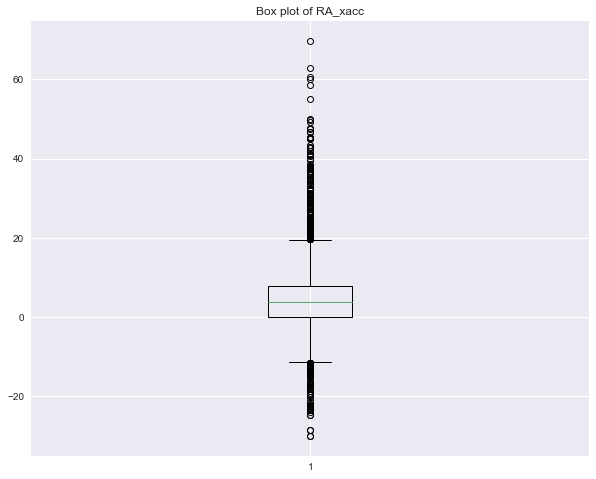

In [270]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RA_xacc'])
plt.title('Box plot of RA_xacc')

In [271]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['RA_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['RA_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['RA_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['RA_xacc']<low_limit) | (data['RA_xacc']>upper_limit)]['RA_xacc']

# Removing the ouliners
ind1= (data['RA_xacc']<low_limit) | (data['RA_xacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)


Q1- 0.10891
Q2- 3.9109
Q3- 7.8366
IQR- 7.72769
low_limit- -11.482625
upper_limit- 19.428135


Text(0.5, 1.0, 'Box plot of RA_xacc')

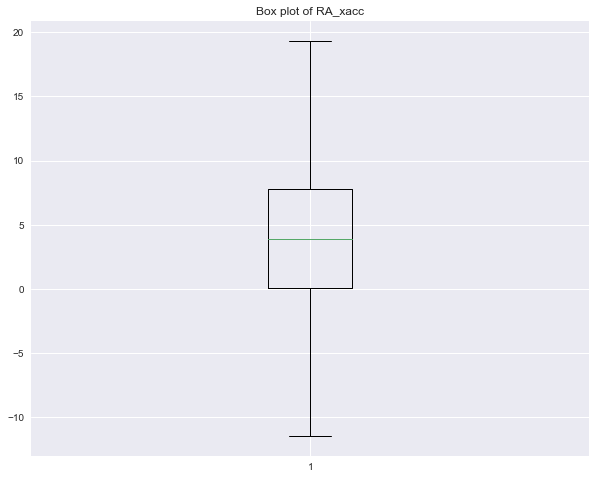

In [272]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RA_xacc'])
plt.title('Box plot of RA_xacc')

Text(0.5, 1.0, 'Box plot of LL_yacc')

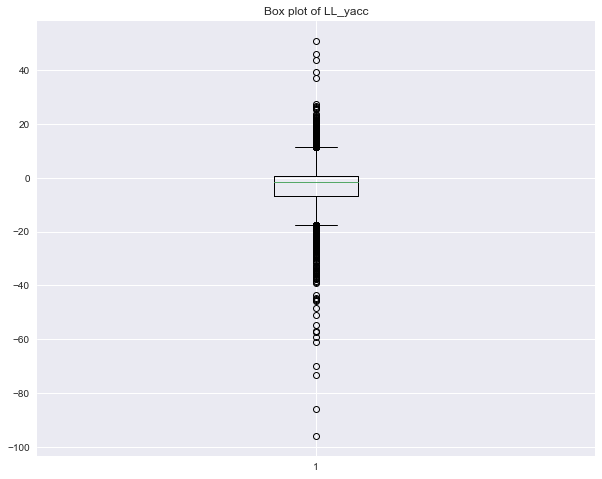

In [273]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['LL_yacc'])
plt.title('Box plot of LL_yacc')

In [274]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['LL_yacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['LL_yacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['LL_yacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['LL_yacc']<low_limit) | (data['LL_yacc']>upper_limit)]['LL_yacc']

# Removing the ouliners
ind1= (data['LL_yacc']<low_limit) | (data['LL_yacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)

Q1- -6.6845
Q2- -1.5183
Q3- 0.52124
IQR- 7.20574
low_limit- -17.49311
upper_limit- 11.32985


Text(0.5, 1.0, 'Box plot of LL_yacc')

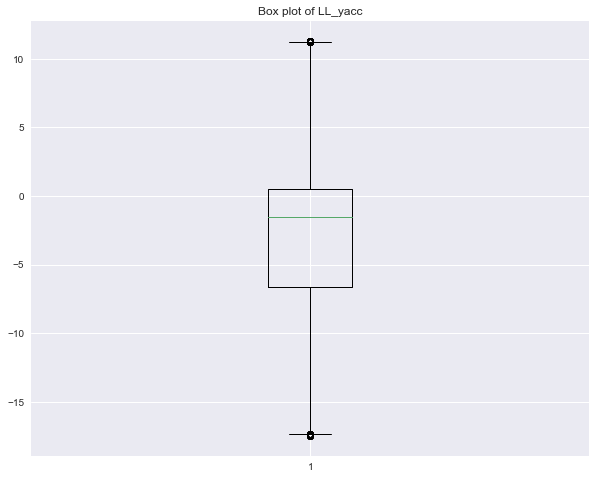

In [275]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['LL_yacc'])
plt.title('Box plot of LL_yacc')

In [276]:
from sklearn.linear_model import LogisticRegression

In [277]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score

In [278]:
y = data["Activity"]
X = data.drop(["Activity"], axis=1)
X

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.0411,1.15300,5.51410,-0.024100,-0.002951,0.007333,-0.78981,-0.072298,0.14805,0.61037,...,-0.040150,-2.8548,-9.063300,2.63930,-0.004407,-0.000894,-0.000569,0.74138,0.30115,-0.056264
1,8.1009,1.13820,5.39510,-0.002307,-0.005099,-0.007220,-0.78982,-0.071518,0.14791,0.62262,...,-0.038971,-2.8697,-9.063300,2.66150,-0.008110,-0.005275,0.004845,0.74128,0.30287,-0.057228
2,8.0859,1.11590,5.43210,0.001318,0.000328,-0.001767,-0.79104,-0.072855,0.15002,0.59345,...,-0.040378,-2.8098,-9.063500,2.63260,-0.014279,0.007983,-0.002314,0.74225,0.30325,-0.054814
3,8.0710,1.13820,5.45450,0.001293,-0.006885,-0.005384,-0.79078,-0.070271,0.15001,0.57373,...,-0.038743,-2.7949,-9.093500,2.63280,-0.018723,0.006059,-0.007749,0.74230,0.30325,-0.054149
4,8.0708,1.12310,5.51410,-0.021358,0.000598,0.005500,-0.79211,-0.072200,0.15011,0.54932,...,-0.038747,-2.7874,-9.093500,2.61800,0.007612,0.009518,-0.018648,0.73976,0.30298,-0.056217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142410,6.3431,-2.57210,-0.91615,-1.022000,-1.258700,-0.331560,-0.67071,0.380810,-0.61057,-3.62440,...,-0.168660,-9.1477,-3.217500,-1.26920,0.990310,-0.296190,-0.734630,0.67137,0.75836,0.163010
142425,3.9995,-2.63260,0.42345,-0.712220,1.431700,-0.597320,-0.84459,0.276420,-0.42815,-4.41770,...,-0.287140,-6.6841,-0.014519,0.18548,-1.757200,-0.315770,0.867190,0.62704,0.75208,0.317910
142426,3.4583,-1.48680,-1.61730,-1.999800,1.956000,-0.836740,-0.82163,0.278030,-0.46917,-1.42000,...,-0.316140,-6.8505,0.007518,-1.62510,-1.288700,-0.122550,0.669290,0.65577,0.71204,0.359480
142438,10.4980,-2.24050,-5.13480,-4.516200,-1.656300,-3.946800,-0.98807,0.128670,-0.14230,-5.71980,...,-0.371220,-13.1980,3.976600,-4.54550,-1.354300,0.017177,-0.912510,0.75352,0.62996,0.384860


In [279]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [280]:
print(confusion_matrix(y_test, predictions))

[[1344    0    0    0    0    0    2    5    7    0    1    0    0    7
     0    0   11]
 [   0 1227    0    0    0    0    0   20    0    0    0    0   34    3
     0    0    1]
 [   0    0 1306    0    0    0    0    0    0    3    0    0    0    1
     0    0    0]
 [   0    0    1 1563    1    0    2    0    0    2    0    0    0    0
     0    0    0]
 [   0    0    0    0 1798    2    0   14    1    0   16    0    0    0
     0    1    0]
 [   0    0    0    0    1 1423    0    0   63    0    0    0    2    0
     0    0    6]
 [  14    0    0    1    2    0  268    3    3    0    0    1    1    0
     0    0    2]
 [  12   35    0    0    5    3    6 1724   70    0    0    0    6   21
     0    0    9]
 [  13   15    5    5   47  115    6   43  856    0    8    1    9   12
     3    4   17]
 [   0    0    3    0    0    0    0    0    0 1454    0    0    1    0
     3    0    0]
 [   0    0    3    4    4    3    3   14    2    1  234    0    1    0
    25    4    0]
 [   0    

In [281]:
print(classification_report(y_test, predictions))

                                     precision    recall  f1-score   support

                   Ascending stairs       0.97      0.98      0.97      1377
                   Decending stairs       0.96      0.95      0.96      1285
     cycling in horizontal position       0.99      1.00      0.99      1310
       cycling in vertical position       0.99      1.00      0.99      1569
      exercising on a cross trainer       0.96      0.98      0.97      1832
            exercising on a stepper       0.92      0.95      0.94      1495
                            jumping       0.93      0.91      0.92       295
       moving around in an elevator       0.94      0.91      0.93      1891
                 playing basketball       0.85      0.74      0.79      1159
                             rowing       1.00      1.00      1.00      1461
                  running (8 km/hr)       0.90      0.79      0.84       298
                            sitting       1.00      1.00      1.00      184

### Feature selection/Reduction

In [282]:
corrMartix = data[['RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
         'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag']].corr()

<AxesSubplot:>

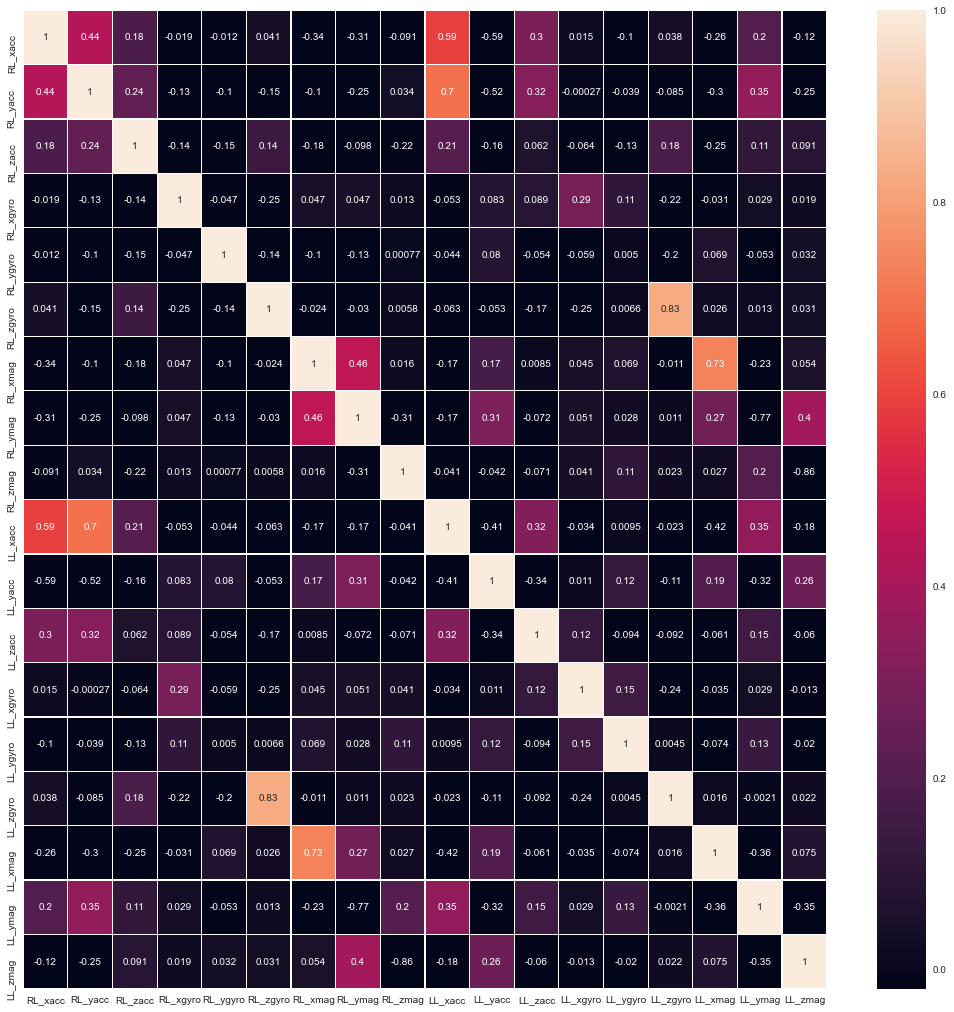

In [283]:
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.02,vmax=1,annot=True,linewidth=0.2)

<AxesSubplot:>

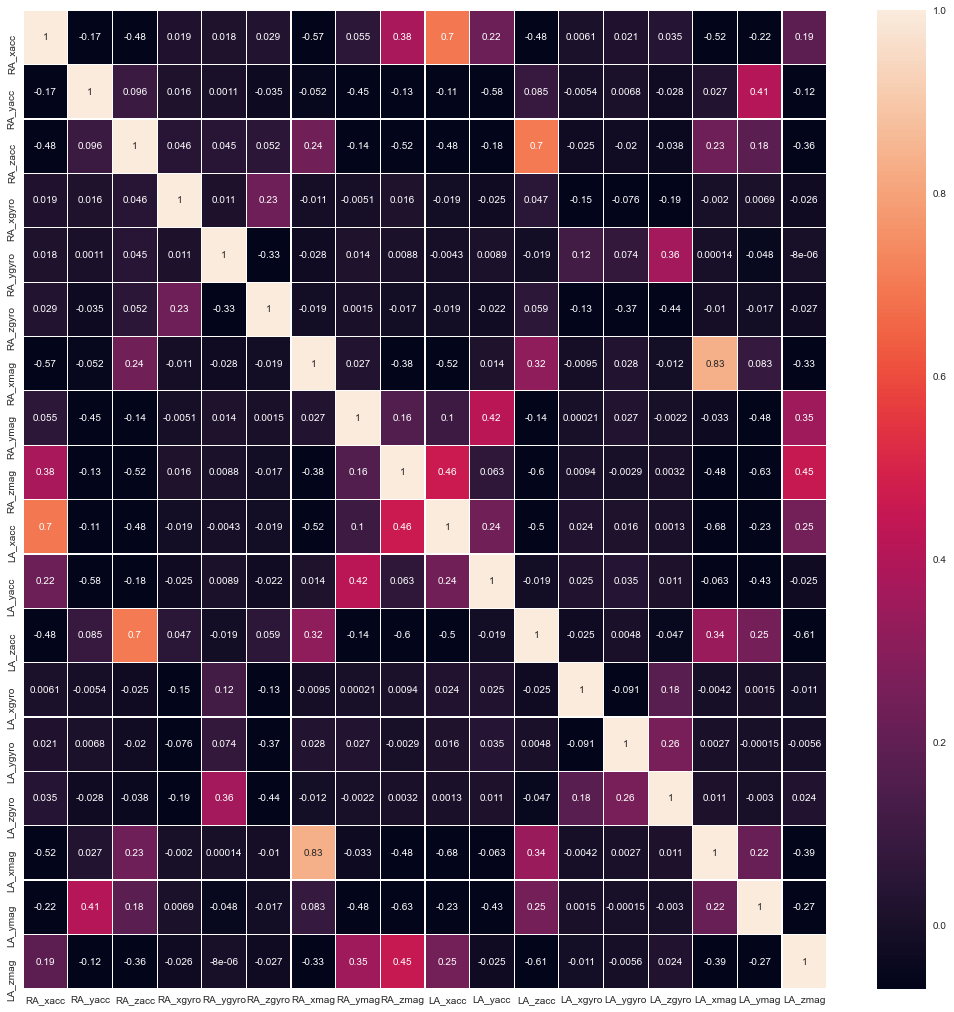

In [284]:
corrMartix = data[['RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
         'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag']].corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.07,vmax=1,annot=True,linewidth=0.2)

In [285]:
y = data["Activity"]
X = data.drop(['Activity'], axis=1)
#X = data.drop(['Activity','LL_xacc','LL_zgyro','LL_xmag','LL_ymag'], axis=1)
#X = data.drop(['LA_xacc','LA_xmag','RA_ymag','LA_yacc','RA_zmag','LA_zacc','LA_zmag',
#              'LL_xacc','LL_zgyro','LL_xmag','LL_ymag','Activity'], axis=1)

In [286]:
#X.drop(X.columns[[35,7,34,17,8,32,36,27,6,16,38]], axis=1)

In [287]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [288]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1344    0    0    0    0    0    2    5    7    0    1    0    0    7
     0    0   11]
 [   0 1227    0    0    0    0    0   20    0    0    0    0   34    3
     0    0    1]
 [   0    0 1306    0    0    0    0    0    0    3    0    0    0    1
     0    0    0]
 [   0    0    1 1563    1    0    2    0    0    2    0    0    0    0
     0    0    0]
 [   0    0    0    0 1798    2    0   14    1    0   16    0    0    0
     0    1    0]
 [   0    0    0    0    1 1423    0    0   63    0    0    0    2    0
     0    0    6]
 [  14    0    0    1    2    0  268    3    3    0    0    1    1    0
     0    0    2]
 [  12   35    0    0    5    3    6 1724   70    0    0    0    6   21
     0    0    9]
 [  13   15    5    5   47  115    6   43  856    0    8    1    9   12
     3    4   17]
 [   0    0    3    0    0    0    0    0    0 1454    0    0    1    0
     3    0    0]
 [   0    0    3    4    4    3    3   14    2    1  234    0    1    0
    25    4    0]
 [   0    

### Standardization/Normalization

In [289]:
#minMaxScaler = preprocessing.StandardScaler()
minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[1365    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    0   11]
 [   0 1270    0    0    0    0    0   14    0    0    0    0    1    0
     0    0    0]
 [   0    0 1310    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 1569    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1832    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0 1479    0    1   15    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  295    0    0    0    0    0    0    0
     0    0    0]
 [  11   13    0    0    1    0    0 1790   67    0    0    0    2    7
     0    0    0]
 [   5   10    0    2    8   59    3   26 1015    0    2    0    5    1
     9    6    8]
 [   0    0    0    0    0    0    0    0    0 1461    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  236    0    0    0
    57    5    0]
 [   0    

### Encoding

In [290]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(data["Activity"])

In [291]:
#y = data["Activity"]
X = data.drop(['Activity'], axis=1)

minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1365    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    0   11]
 [   0 1270    0    0    0    0    0   14    0    0    0    0    1    0
     0    0    0]
 [   0    0 1310    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 1569    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1832    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0 1479    0    1   15    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  295    0    0    0    0    0    0    0
     0    0    0]
 [  11   13    0    0    1    0    0 1790   67    0    0    0    2    7
     0    0    0]
 [   5   10    0    2    8   59    3   26 1015    0    2    0    5    1
     9    6    8]
 [   0    0    0    0    0    0    0    0    0 1461    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  236    0    0    0
    57    5    0]
 [   0    

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Expolatory Data analyis

Text(0.5, 0, 'Right Leg')

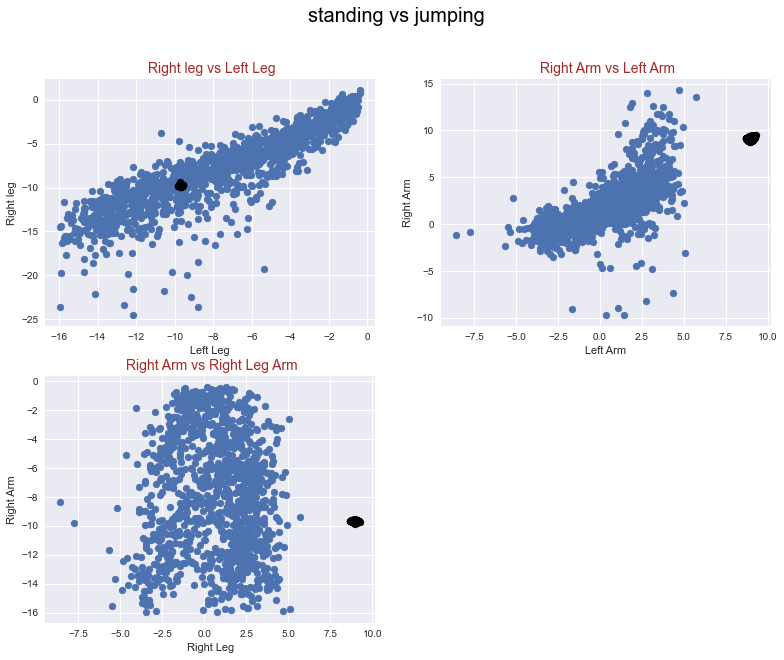

In [292]:
standingData=data[data["Activity"]=="standing"]
jumpingData=data[data["Activity"]=="jumping"]

plt.figure(figsize=(13, 10))
plt.suptitle("standing vs jumping",size=20,color="black")
plt.style.use("seaborn")
plt.subplot(221)
plt.scatter(jumpingData['RL_xacc'],jumpingData['LL_xacc'],label="jumping")
plt.scatter(standingData['RL_xacc'],standingData['LL_xacc'],color="black",label="standing")


plt.title(" Right leg vs Left Leg", size=14,color="brown")
plt.ylabel("Right leg")
plt.xlabel("Left Leg")
#plt.legend(fontsize="10")

#plt.figure(figsize=(13, 10))
#plt.suptitle("standing vs jumping",size=20,color="black")
plt.style.use("seaborn")
plt.subplot(222)
plt.scatter(jumpingData['RA_xacc'],jumpingData['LA_xacc'],label="jumping")
plt.scatter(standingData['RA_xacc'],standingData['LA_xacc'],color="black",label="standing")


plt.title(" Right Arm vs Left Arm", size=14,color="brown")
plt.ylabel("Right Arm")
plt.xlabel("Left Arm")
#plt.legend(fontsize="10")

plt.style.use("seaborn")
plt.subplot(223)
plt.scatter(jumpingData['RA_xacc'],jumpingData['RL_xacc'],label="jumping")
plt.scatter(standingData['RA_xacc'],standingData['RL_xacc'],color="black",label="standing")


plt.title(" Right Arm vs Right Leg Arm", size=14,color="brown")
plt.ylabel("Right Arm")
plt.xlabel("Right Leg")
#plt.legend(fontsize="10")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Ascending stairs'),
  Text(1, 0, 'Decending stairs'),
  Text(2, 0, 'cycling in horizontal position'),
  Text(3, 0, 'cycling in vertical position'),
  Text(4, 0, 'exercising on a cross trainer'),
  Text(5, 0, 'exercising on a stepper'),
  Text(6, 0, 'jumping'),
  Text(7, 0, 'moving around in an elevator'),
  Text(8, 0, 'playing basketball'),
  Text(9, 0, 'rowing'),
  Text(10, 0, 'running (8 km/hr)'),
  Text(11, 0, 'sitting'),
  Text(12, 0, 'standing'),
  Text(13, 0, 'standing in an elevator'),
  Text(14, 0, 'walking (4 km/h) in 15 deg inclined'),
  Text(15, 0, 'walking (4 km/h) in flat'),
  Text(16, 0, 'walking in a parking lot')])

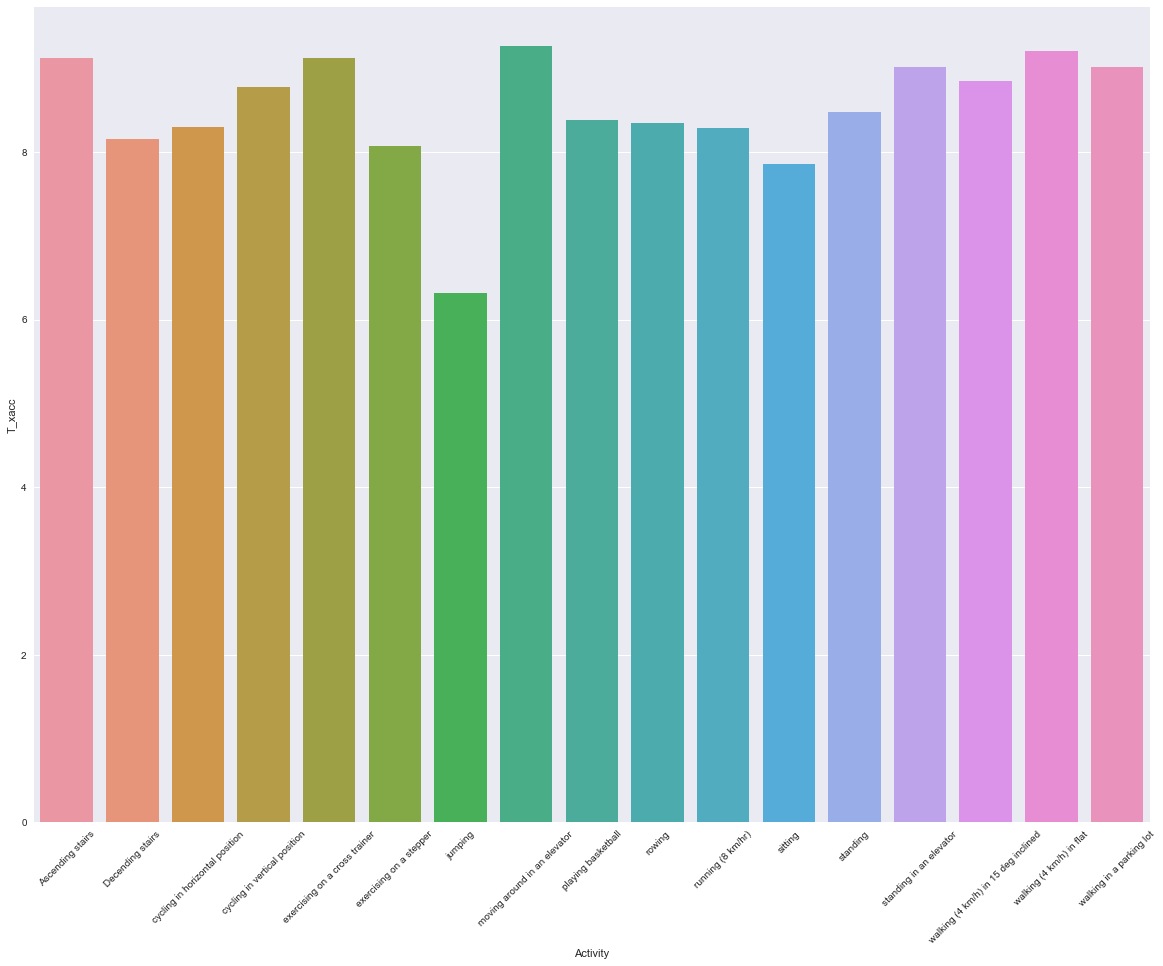

In [293]:
plt.figure(figsize=(20, 15))
df1 = data.groupby('Activity').mean()
df1
df1.reset_index(inplace=True)
sns.barplot(x='Activity', y='T_xacc', data=df1);
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Ascending stairs'),
  Text(1, 0, 'Decending stairs'),
  Text(2, 0, 'cycling in horizontal position'),
  Text(3, 0, 'cycling in vertical position'),
  Text(4, 0, 'exercising on a cross trainer'),
  Text(5, 0, 'exercising on a stepper'),
  Text(6, 0, 'jumping'),
  Text(7, 0, 'moving around in an elevator'),
  Text(8, 0, 'playing basketball'),
  Text(9, 0, 'rowing'),
  Text(10, 0, 'running (8 km/hr)'),
  Text(11, 0, 'sitting'),
  Text(12, 0, 'standing'),
  Text(13, 0, 'standing in an elevator'),
  Text(14, 0, 'walking (4 km/h) in 15 deg inclined'),
  Text(15, 0, 'walking (4 km/h) in flat'),
  Text(16, 0, 'walking in a parking lot')])

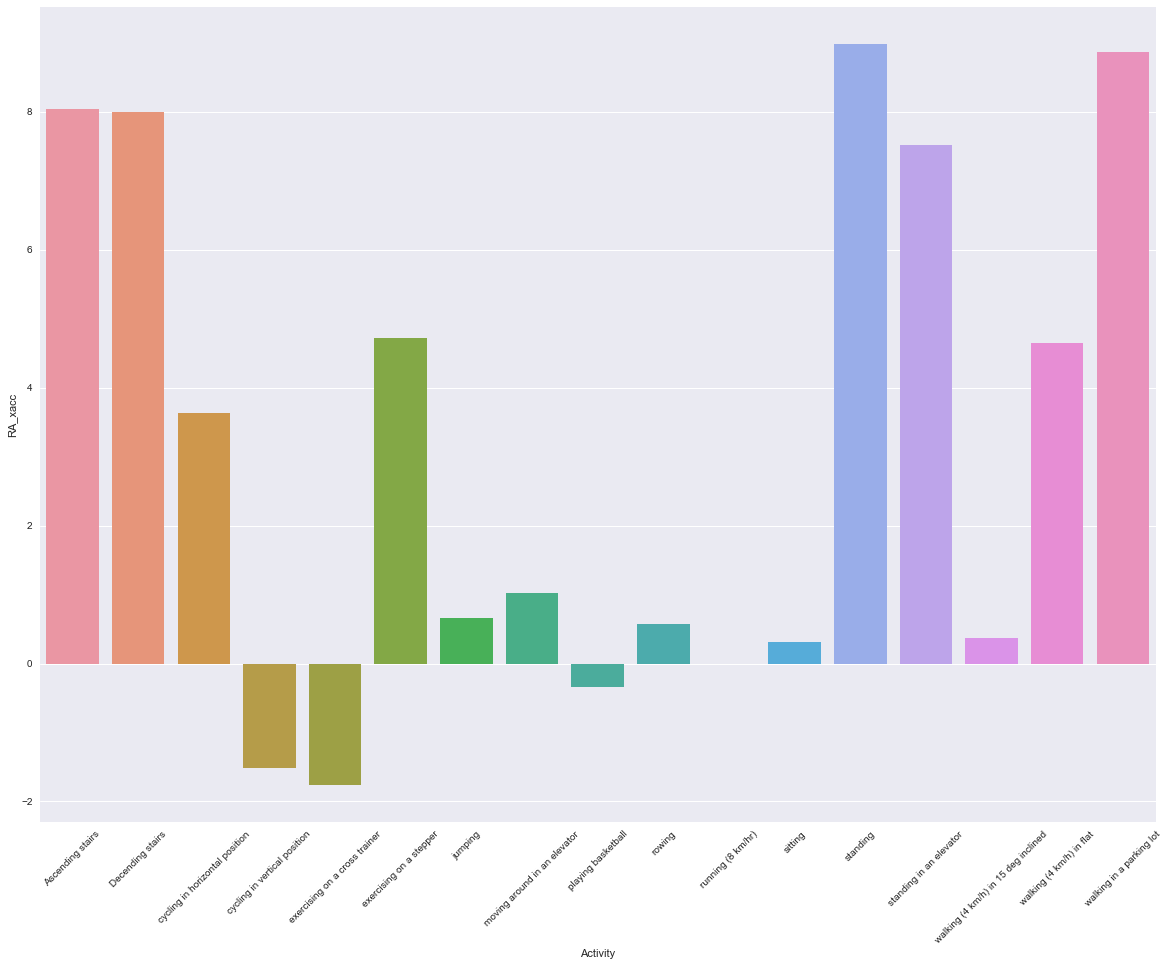

In [295]:
plt.figure(figsize=(20, 15))
df1 = data.groupby('Activity').mean()
df1
df1.reset_index(inplace=True)
sns.barplot(x='Activity', y='RA_xacc', data=df1);
plt.xticks(rotation=45)

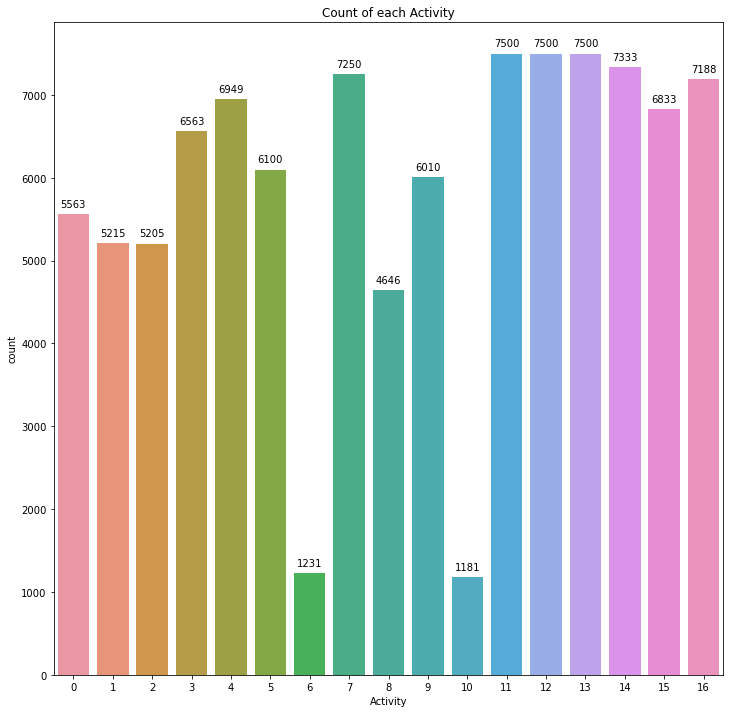

In [177]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x="Activity",data=data)
plt.title("Count of each Activity");
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

array([[<AxesSubplot:title={'center':'T_xacc'}>,
        <AxesSubplot:title={'center':'T_yacc'}>,
        <AxesSubplot:title={'center':'T_zacc'}>,
        <AxesSubplot:title={'center':'T_xgyro'}>,
        <AxesSubplot:title={'center':'T_ygyro'}>,
        <AxesSubplot:title={'center':'T_zgyro'}>,
        <AxesSubplot:title={'center':'T_xmag'}>],
       [<AxesSubplot:title={'center':'T_ymag'}>,
        <AxesSubplot:title={'center':'T_zmag'}>,
        <AxesSubplot:title={'center':'RA_xacc'}>,
        <AxesSubplot:title={'center':'RA_yacc'}>,
        <AxesSubplot:title={'center':'RA_zacc'}>,
        <AxesSubplot:title={'center':'RA_xgyro'}>,
        <AxesSubplot:title={'center':'RA_ygyro'}>],
       [<AxesSubplot:title={'center':'RA_zgyro'}>,
        <AxesSubplot:title={'center':'RA_xmag'}>,
        <AxesSubplot:title={'center':'RA_ymag'}>,
        <AxesSubplot:title={'center':'RA_zmag'}>,
        <AxesSubplot:title={'center':'LA_xacc'}>,
        <AxesSubplot:title={'center':'LA_yacc'}>,
 

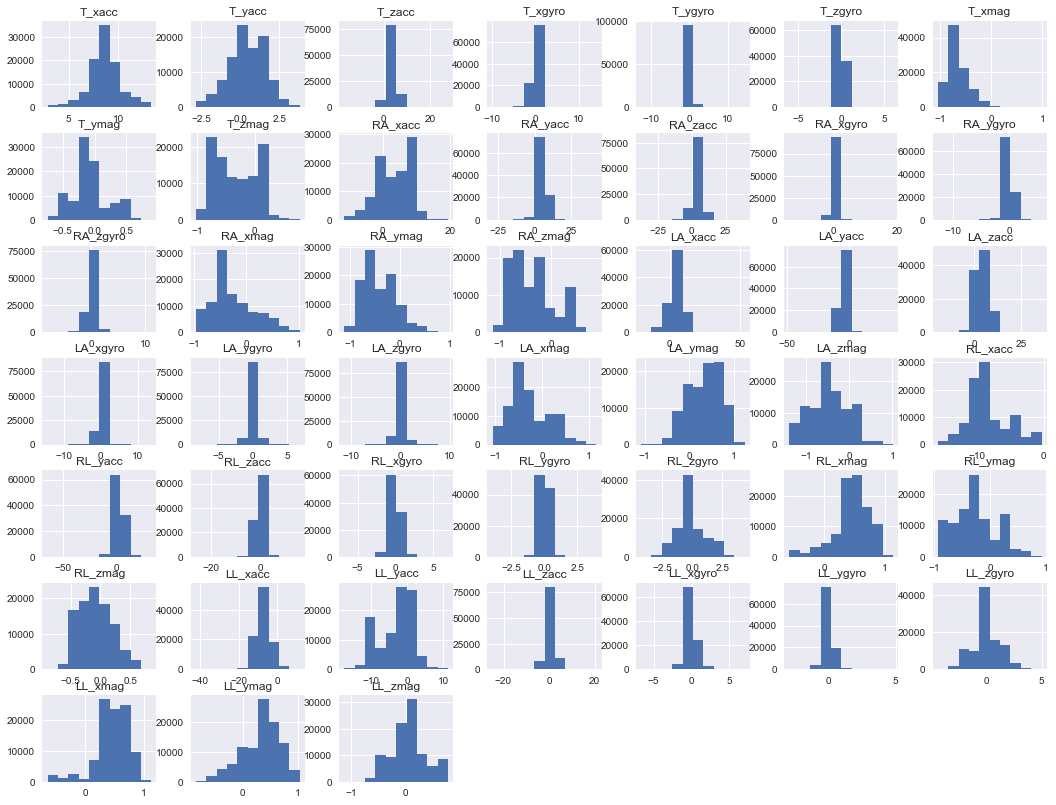

In [296]:
data.hist(figsize=(18, 14))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(1, 0, 'T_xacc'),
  Text(2, 0, 'T_yacc'),
  Text(3, 0, 'T_zacc'),
  Text(4, 0, 'T_xgyro'),
  Text(5, 0, 'T_ygyro'),
  Text(6, 0, 'T_zgyro'),
  Text(7, 0, 'T_xmag'),
  Text(8, 0, 'T_ymag'),
  Text(9, 0, 'T_zmag'),
  Text(10, 0, 'RA_xacc'),
  Text(11, 0, 'RA_yacc'),
  Text(12, 0, 'RA_zacc'),
  Text(13, 0, 'RA_xgyro'),
  Text(14, 0, 'RA_ygyro'),
  Text(15, 0, 'RA_zgyro'),
  Text(16, 0, 'RA_xmag'),
  Text(17, 0, 'RA_ymag'),
  Text(18, 0, 'RA_zmag'),
  Text(19, 0, 'LA_xacc'),
  Text(20, 0, 'LA_yacc'),
  Text(21, 0, 'LA_zacc'),
  Text(22, 0, 'LA_xgyro'),
  Text(23, 0, 'LA_ygyro'),
  Text(24, 0, 'LA_zgyro'),
  Text(25, 0, 'LA_xmag'),
  Text(26, 0, 'LA_ymag'),
  Text(27, 0, 'LA_zmag'),
  Text(28, 0, 'RL_xacc'),
  Text(29, 0, 'RL_yacc'),
  Text(30, 0, 'RL_zacc'),
  Text(31, 0, 'RL_xgyro

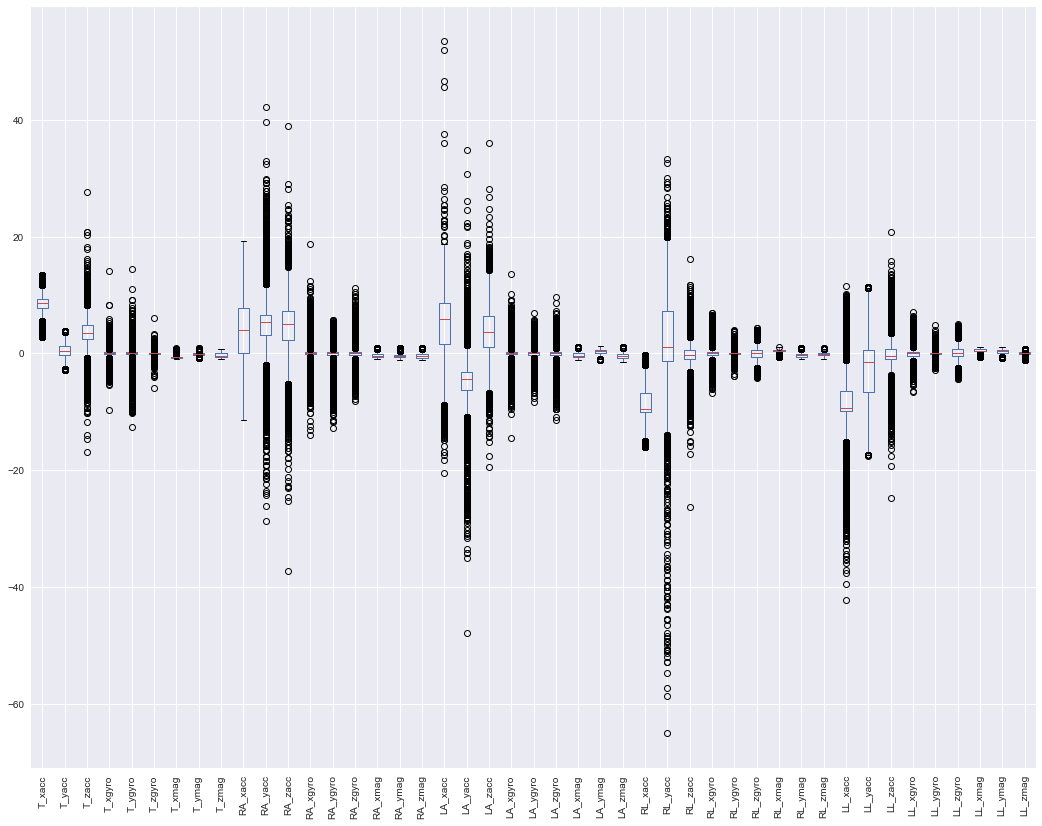

In [297]:
plt.figure(figsize=(18, 14))
data.boxplot()
plt.xticks(rotation=90) 

## Modeling

### LogisticRegression

In [299]:
y = data["Activity"]
X = data.drop(['Activity'], axis=1)

minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[1365    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    0   11]
 [   0 1270    0    0    0    0    0   14    0    0    0    0    1    0
     0    0    0]
 [   0    0 1310    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 1569    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1832    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0 1479    0    1   15    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  295    0    0    0    0    0    0    0
     0    0    0]
 [  11   13    0    0    1    0    0 1790   67    0    0    0    2    7
     0    0    0]
 [   5   10    0    2    8   59    3   26 1015    0    2    0    5    1
     9    6    8]
 [   0    0    0    0    0    0    0    0    0 1461    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  236    0    0    0
    57    5    0]
 [   0    

### KNN

In [300]:
from sklearn.neighbors import KNeighborsClassifier

In [301]:
# Identifty the best values for n_neighbors

### Model fine tuning

In [302]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    #confusion_matrix(y_test, predictions)
    acc_values.append(accuracy_score(y_test, predictions))
    
acc_values

[0.9979151631785743,
 0.9968727447678615,
 0.997033116831048,
 0.9959906984203352,
 0.9963114425467083,
 0.9953492101675888,
 0.9954694892149788,
 0.9946676288990458,
 0.9946275358832491,
 0.9937454895357228,
 0.9939860476305028,
 0.9936653035041296]

Text(0, 0.5, 'Accuracy')

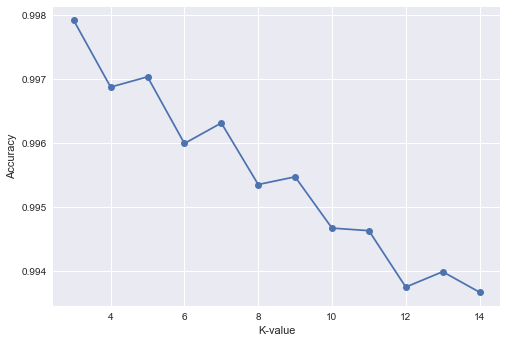

In [303]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [ ]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [304]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=3,metric="minkowski",p=2)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[1377,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0, 1284,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0, 1310,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1569,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1832,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1495,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  295,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   5,    1,    0,    0,    0,    0,    0, 1885,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   7,    2,    0,    1,    1,   20,    2

In [305]:
print(classification_report(y_test, predictions))

                                     precision    recall  f1-score   support

                   Ascending stairs       0.99      1.00      1.00      1377
                   Decending stairs       1.00      1.00      1.00      1285
     cycling in horizontal position       1.00      1.00      1.00      1310
       cycling in vertical position       1.00      1.00      1.00      1569
      exercising on a cross trainer       1.00      1.00      1.00      1832
            exercising on a stepper       0.99      1.00      0.99      1495
                            jumping       0.99      1.00      1.00       295
       moving around in an elevator       1.00      1.00      1.00      1891
                 playing basketball       1.00      0.96      0.98      1159
                             rowing       1.00      1.00      1.00      1461
                  running (8 km/hr)       0.99      1.00      0.99       298
                            sitting       1.00      1.00      1.00      184

### SVM

In [306]:
from sklearn.svm import SVC

In [307]:
clf = SVC(kernel='linear') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1377    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0 1284    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0]
 [   0    0 1310    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 1569    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1832    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0 1488    0    0    7    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  295    0    0    0    0    0    0    0
     0    0    0]
 [   4   13    0    0    0    0    0 1837   34    0    0    0    0    3
     0    0    0]
 [   4    2    0    0    0   55    1   26 1071    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0 1461    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  279    0    0    0
    18    1    0]
 [   0    

In [308]:
clf = SVC(kernel='rbf') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1377    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0 1284    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0]
 [   0    0 1310    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 1569    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1832    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0 1491    0    0    4    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  295    0    0    0    0    0    0    0
     0    0    0]
 [   0    1    0    0    0    0    0 1890    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    1    0    0 1158    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0 1461    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  298    0    0    0
     0    0    0]
 [   0    

### Decision Tree

In [309]:
from sklearn.tree import DecisionTreeClassifier

In [310]:
dclf = DecisionTreeClassifier()
model = dclf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1372    0    0    0    0    0    0    2    2    0    0    0    0    1
     0    0    0]
 [   0 1274    0    0    0    0    0    7    2    0    0    0    0    0
     0    0    2]
 [   0    0 1310    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 1567    0    0    0    0    2    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1830    0    0    0    1    0    0    0    0    0
     1    0    0]
 [   0    0    0    0    0 1478    0    0   17    0    0    0    0    0
     0    0    0]
 [   1    0    0    0    0    0  290    1    3    0    0    0    0    0
     0    0    0]
 [   1    2    0    0    0    0    0 1881    3    0    0    0    0    1
     0    0    3]
 [   1    3    0    1    1   11    1    3 1130    0    1    0    1    1
     1    0    4]
 [   0    0    0    0    0    0    0    0    0 1461    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    3    0  290    0    0    0
     3    2    0]
 [   0    

### Random Forest

In [311]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
nmclf=RandomForestClassifier(n_estimators=50)
model = nmclf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1377    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0 1284    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0]
 [   0    0 1310    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 1569    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1832    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0 1493    0    0    2    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  295    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0 1891    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    3    0    0 1156    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0 1461    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  298    0    0    0
     0    0    0]
 [   0    

# Beach Weather Stations Automated sensor Data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Import Dataset

In [50]:
data=pd.read_csv("beach-weather-stations-automated-sensors-1.csv")
data.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,Oak Street Weather Station,05/22/2015 03:00:00 PM,NaN,7.0,55.0,0.0,0.0,1.4,0.0,63.0,1.9,2.8,NaN,780.0,322.0,12.0,05/22/2015 3:00 PM,OakStreetWeatherStation201505221500
1,Oak Street Weather Station,05/22/2015 05:00:00 PM,NaN,6.3,56.0,0.0,0.0,1.4,0.0,124.0,1.5,2.3,NaN,180.0,322.0,12.1,05/22/2015 5:00 PM,OakStreetWeatherStation201505221700
2,Oak Street Weather Station,05/22/2015 06:00:00 PM,NaN,6.5,54.0,0.0,0.0,1.4,0.0,156.0,1.9,3.4,NaN,127.0,322.0,12.1,05/22/2015 6:00 PM,OakStreetWeatherStation201505221800
3,Oak Street Weather Station,05/22/2015 07:00:00 PM,NaN,6.3,53.0,0.0,0.0,1.4,0.0,150.0,1.4,4.5,NaN,67.0,322.0,12.1,05/22/2015 7:00 PM,OakStreetWeatherStation201505221900
4,Oak Street Weather Station,05/22/2015 08:00:00 PM,NaN,6.4,52.0,0.0,0.0,1.4,0.0,155.0,1.1,2.3,NaN,10.0,322.0,12.0,05/22/2015 8:00 PM,OakStreetWeatherStation201505222000


In [51]:
data.isnull().sum()

Station Name                       0
Measurement Timestamp              3
Air Temperature                   78
Wet Bulb Temperature           20301
Humidity                           3
Rain Intensity                 20301
Interval Rain                      3
Total Rain                     20301
Precipitation Type             20301
Wind Direction                     3
Wind Speed                         3
Maximum Wind Speed                 3
Barometric Pressure              149
Solar Radiation                    3
Heading                        20301
Battery Life                       3
Measurement Timestamp Label        3
Measurement ID                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Air Temperature'}>,
        <AxesSubplot:title={'center':'Wet Bulb Temperature'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Rain Intensity'}>],
       [<AxesSubplot:title={'center':'Interval Rain'}>,
        <AxesSubplot:title={'center':'Total Rain'}>,
        <AxesSubplot:title={'center':'Precipitation Type'}>,
        <AxesSubplot:title={'center':'Wind Direction'}>],
       [<AxesSubplot:title={'center':'Wind Speed'}>,
        <AxesSubplot:title={'center':'Maximum Wind Speed'}>,
        <AxesSubplot:title={'center':'Barometric Pressure'}>,
        <AxesSubplot:title={'center':'Solar Radiation'}>],
       [<AxesSubplot:title={'center':'Heading'}>,
        <AxesSubplot:title={'center':'Battery Life'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

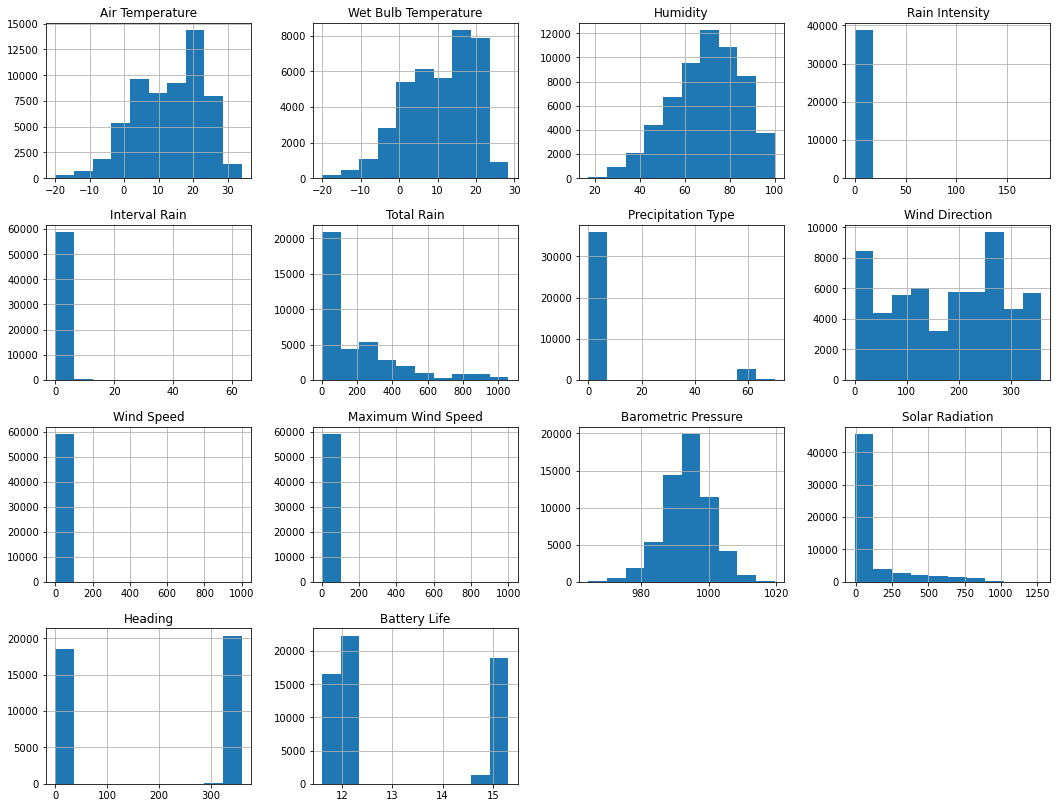

In [52]:
data.hist(figsize=(18, 14))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Air Temperature'),
  Text(2, 0, 'Wet Bulb Temperature'),
  Text(3, 0, 'Humidity'),
  Text(4, 0, 'Rain Intensity'),
  Text(5, 0, 'Interval Rain'),
  Text(6, 0, 'Total Rain'),
  Text(7, 0, 'Precipitation Type'),
  Text(8, 0, 'Wind Direction'),
  Text(9, 0, 'Wind Speed'),
  Text(10, 0, 'Maximum Wind Speed'),
  Text(11, 0, 'Barometric Pressure'),
  Text(12, 0, 'Solar Radiation'),
  Text(13, 0, 'Heading'),
  Text(14, 0, 'Battery Life')])

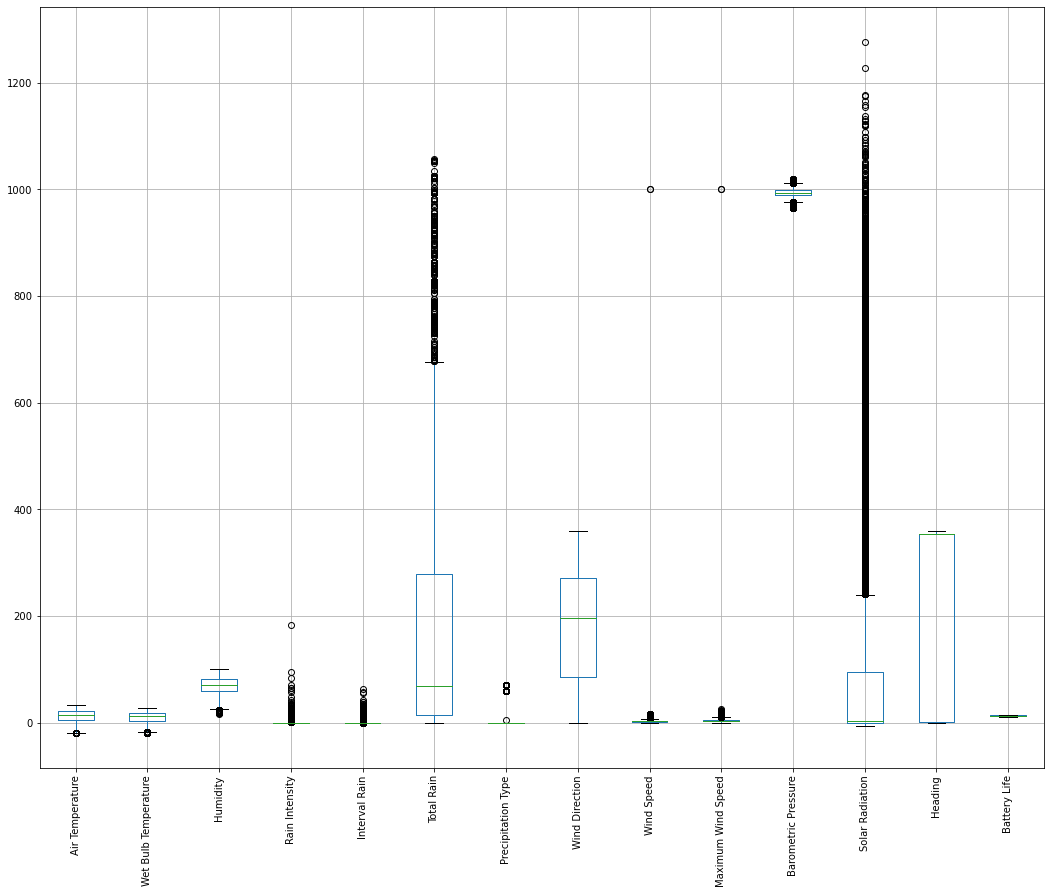

In [53]:
plt.figure(figsize=(18, 14))
data.boxplot()
plt.xticks(rotation=90) 

In [54]:
corrMartix = data.corr()

<AxesSubplot:>

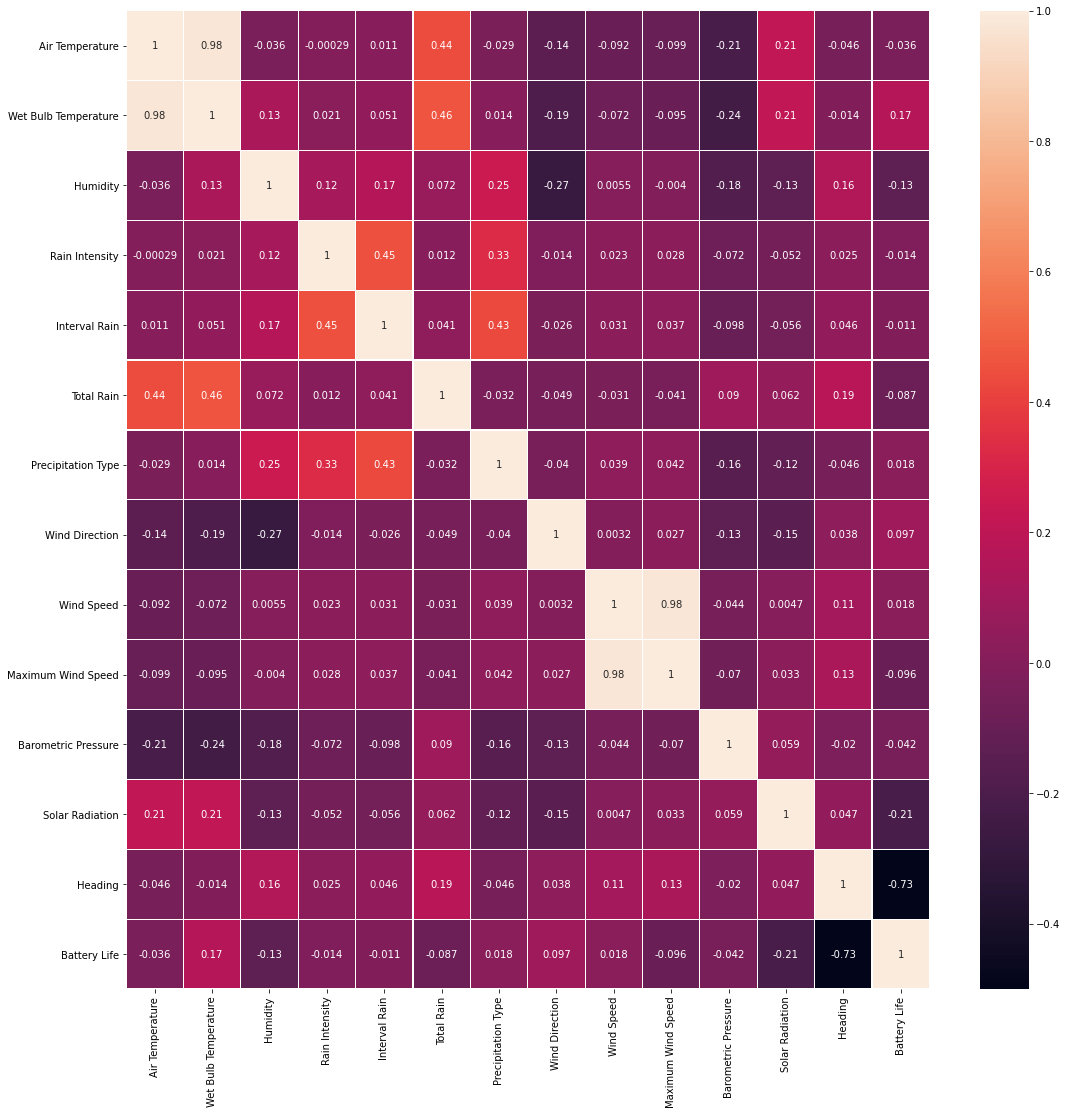

In [55]:
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.5,vmax=1,annot=True,linewidth=0.2)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59144 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59066 non-null  float64
 3   Wet Bulb Temperature         38843 non-null  float64
 4   Humidity                     59141 non-null  float64
 5   Rain Intensity               38843 non-null  float64
 6   Interval Rain                59141 non-null  float64
 7   Total Rain                   38843 non-null  float64
 8   Precipitation Type           38843 non-null  float64
 9   Wind Direction               59141 non-null  float64
 10  Wind Speed                   59141 non-null  float64
 11  Maximum Wind Speed           59141 non-null  float64
 12  Barometric Pressure          58995 non-null  float64
 13  Solar Radiation 

In [57]:
data = data.drop(['Wet Bulb Temperature','Measurement ID','Measurement Timestamp Label','Maximum Wind Speed'], axis=1)

In [58]:
#data.drop(data[data['Heading'].isnull()].index, inplace =True)
#data.drop(data[data['Air Temperature'].isnull()].index, inplace =True)
data['Air Temperature'] = data['Air Temperature'].fillna(data['Air Temperature'].median())
data['Barometric Pressure'] = data['Barometric Pressure'].fillna(data['Barometric Pressure'].mean())
data[data['Heading'].isnull()] = 0
data[data['Rain Intensity'].isnull()] = 0
data[data['Total Rain'].isnull()] = 0
data[data['Precipitation Type'].isnull()] = 0

In [59]:
data.isnull().sum()

Station Name             0
Measurement Timestamp    0
Air Temperature          0
Humidity                 0
Rain Intensity           0
Interval Rain            0
Total Rain               0
Precipitation Type       0
Wind Direction           0
Wind Speed               0
Barometric Pressure      0
Solar Radiation          0
Heading                  0
Battery Life             0
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station Name           59144 non-null  object 
 1   Measurement Timestamp  59144 non-null  object 
 2   Air Temperature        59144 non-null  float64
 3   Humidity               59144 non-null  float64
 4   Rain Intensity         59144 non-null  float64
 5   Interval Rain          59144 non-null  float64
 6   Total Rain             59144 non-null  float64
 7   Precipitation Type     59144 non-null  float64
 8   Wind Direction         59144 non-null  float64
 9   Wind Speed             59144 non-null  float64
 10  Barometric Pressure    59144 non-null  float64
 11  Solar Radiation        59144 non-null  float64
 12  Heading                59144 non-null  float64
 13  Battery Life           59144 non-null  float64
dtypes: float64(12), object(2)
memory usage: 6.3+ MB


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Air Temperature'),
  Text(2, 0, 'Humidity'),
  Text(3, 0, 'Rain Intensity'),
  Text(4, 0, 'Interval Rain'),
  Text(5, 0, 'Total Rain'),
  Text(6, 0, 'Precipitation Type'),
  Text(7, 0, 'Wind Direction'),
  Text(8, 0, 'Wind Speed'),
  Text(9, 0, 'Barometric Pressure'),
  Text(10, 0, 'Solar Radiation'),
  Text(11, 0, 'Heading'),
  Text(12, 0, 'Battery Life')])

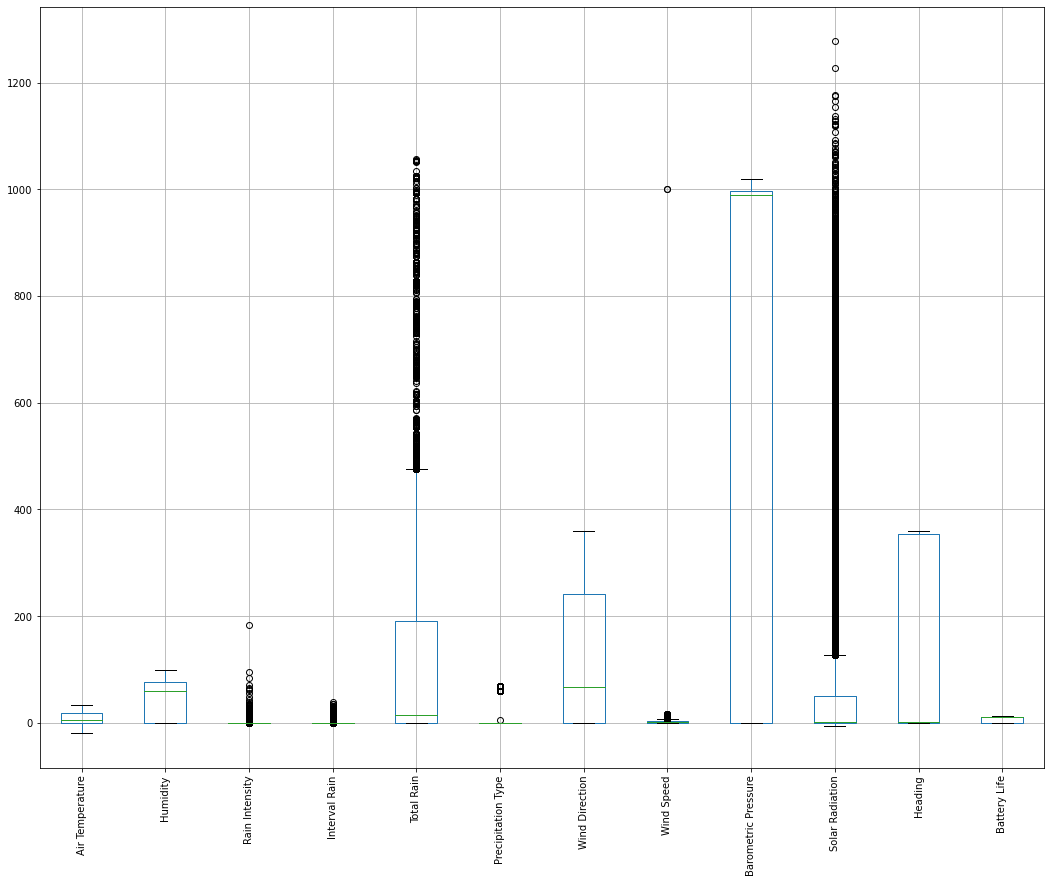

In [61]:
plt.figure(figsize=(18, 14))
data.boxplot()
plt.xticks(rotation=90) 

Text(0.5, 1.0, 'Box plot of Solar Radiation')

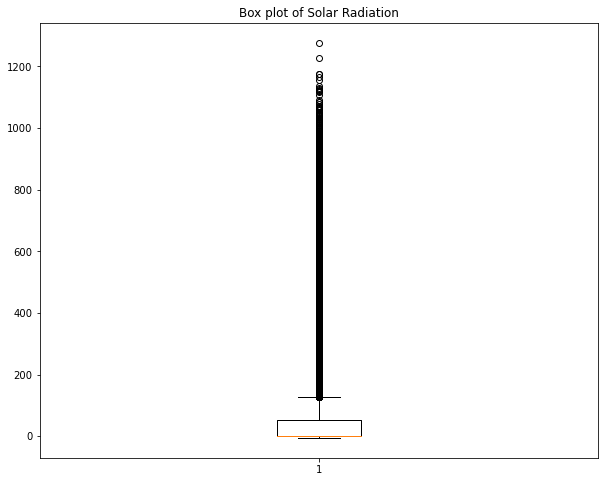

In [62]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Solar Radiation'])
plt.title('Box plot of Solar Radiation')

In [63]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['Solar Radiation'],25,interpolation='midpoint')
Q2 = np.percentile(data['Solar Radiation'],50,interpolation='midpoint')
Q3 = np.percentile(data['Solar Radiation'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['Solar Radiation']<low_limit) | (data['Solar Radiation']>upper_limit)]['Solar Radiation']

# Removing the ouliners
ind1= (data['Solar Radiation']<low_limit) | (data['Solar Radiation']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)

Q1- 0.0
Q2- 1.0
Q3- 51.0
IQR- 51.0
low_limit- -76.5
upper_limit- 127.5


Text(0.5, 1.0, 'Box plot of Solar Radiation')

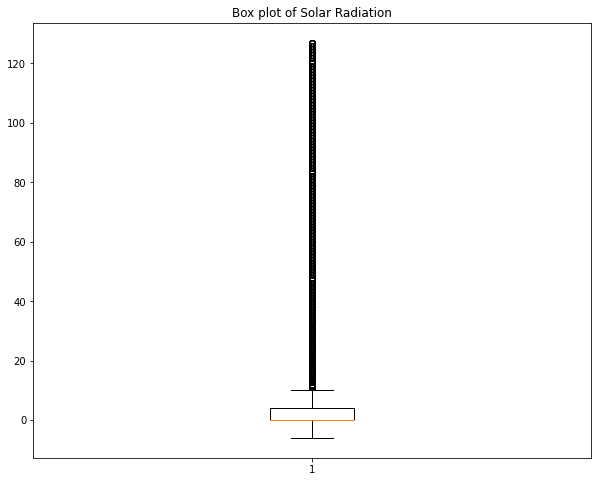

In [64]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Solar Radiation'])
plt.title('Box plot of Solar Radiation')

Text(0.5, 1.0, 'Box plot of Total Rain')

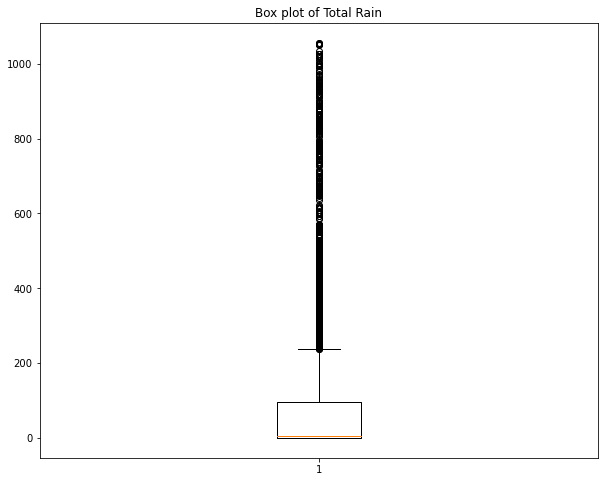

In [65]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Total Rain'])
plt.title('Box plot of Total Rain')

In [66]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['Total Rain'],25,interpolation='midpoint')
Q2 = np.percentile(data['Total Rain'],50,interpolation='midpoint')
Q3 = np.percentile(data['Total Rain'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['Total Rain']<low_limit) | (data['Total Rain']>upper_limit)]['Total Rain']

# Removing the ouliners
ind1= (data['Total Rain']<low_limit) | (data['Total Rain']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)

Q1- 0.0
Q2- 6.0
Q3- 95.2
IQR- 95.2
low_limit- -142.8
upper_limit- 238.0


Text(0.5, 1.0, 'Box plot of Total Rain')

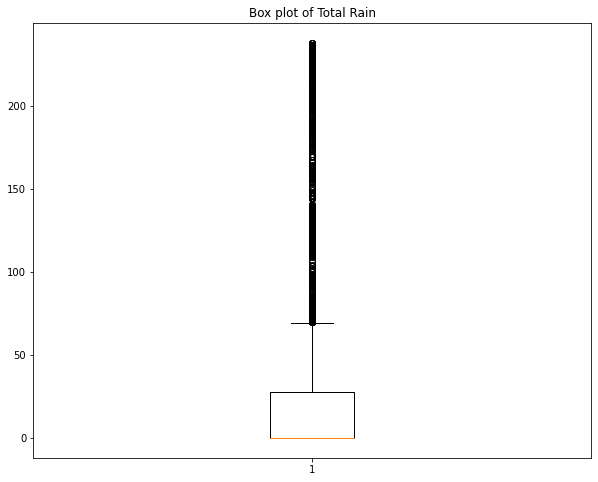

In [67]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Total Rain'])
plt.title('Box plot of Total Rain')

In [68]:
y = data["Battery Life"]
X = data.drop(["Station Name","Battery Life","Measurement Timestamp","Barometric Pressure",
               "Wind Speed","Wind Direction","Precipitation Type"], axis=1)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [71]:
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  2.804762749837636
r squared is  0.92184838


In [72]:
#minMaxScaler = preprocessing.StandardScaler()
minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  2.8047627498376357
r squared is  0.92184838


In [73]:
data["Station Name"].value_counts()

0                              20301
Oak Street Weather Station     10924
63rd Street Weather Station     9143
Name: Station Name, dtype: int64

In [74]:
data[data['Station Name']==0] = '0'

In [75]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data["Station Name"] = le.fit_transform(data["Station Name"])

In [76]:
y = data["Battery Life"]
X = data.drop(["Battery Life","Measurement Timestamp","Barometric Pressure",
               "Wind Speed","Wind Direction","Precipitation Type"], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  0.41457727479010975
r squared is  0.98844826


In [34]:
y = data["Total Rain"]
X = data.drop(["Total Rain","Station Name","Measurement Timestamp","Wind Speed"], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  1886.4057183911038
r squared is  0.41622945
